In [1]:
####Package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time
%matplotlib inline
print("Package imported")

Package imported


In [2]:
members = pd.read_csv('members.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('sample_submission_zero.csv')
#transactions = pd.read_csv('transactions.csv')
#### User logs will be treated seperately later

In [3]:
### Perliminary data views
train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [4]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,URiXrfYPzHAlk+7+n7BOMl9G+T7g8JmrSnT/BU8GmEo=,1,0,NaN,9,20150525,20150526
1,U1q0qCqK/lDMTD2kN8G9OXMtfuvLCey20OAIPOvXXGQ=,1,0,NaN,4,20161221,20161224
2,W6M2H2kAoN9ahfDYKo3J6tmsJRAeuFc9wl1cau5VL1Q=,1,0,NaN,4,20160306,20160309
3,1qE5+cN7CUyC+KFH6gBZzMWmM1QpIVW6A43BEm98I/w=,5,17,female,4,20161031,20161107
4,SeAnaZPI+tFdAt+r3lZt/B8PgTp7bcG/1os39u4pLxs=,1,0,NaN,4,20170202,20170205


In [60]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [5]:
test.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,0


In [6]:
### Data Shape
train.shape

(992931, 2)

In [7]:
test.shape

(970960, 2)

In [8]:
members.shape

(5116194, 7)

In [65]:
transactions.shape

(21547746, 9)

In [9]:
### Preliminary Data Analysis
### Combining the members data with train data
train = pd.merge(train, members, how='left', on='msno')
test = pd.merge(test, members, how='left', on='msno')


In [10]:
train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,20170907.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,20170321.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0,20170203.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0,20170926.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0,20170927.0


In [11]:
train.shape

(992931, 8)

In [13]:
###Data exploration of the combined data
train.describe(include= 'all')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date
count,992931,992931.000000,876143.000000,876143.000000,396057,876143.000000,8.761430e+05,8.761430e+05
unique,992931,NaN,NaN,NaN,2,NaN,NaN,NaN
top,qMTW3dgRtL5gN65gl/5ZNOArZ1rHwhbwdec2AiOQzTI=,NaN,NaN,NaN,male,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,208200,NaN,NaN,NaN
mean,NaN,0.063923,5.954029,13.559955,NaN,6.911001,2.013226e+07,2.017106e+07
std,NaN,0.244616,6.443070,20.153530,NaN,1.905375,2.973735e+04,1.498182e+03
min,NaN,0.000000,1.000000,-3152.000000,NaN,3.000000,2.004033e+07,2.011031e+07
25%,NaN,0.000000,1.000000,0.000000,NaN,7.000000,2.012021e+07,2.017091e+07
50%,NaN,0.000000,1.000000,0.000000,NaN,7.000000,2.014051e+07,2.017092e+07
75%,NaN,0.000000,13.000000,27.000000,NaN,9.000000,2.016011e+07,2.017100e+07


In [14]:
churn_rate = train.is_churn.sum()/len(train)
print(churn_rate*100)

6.39228707735


* So we see that the churn percentage is 6.4%. This is good(if your'e the company) bad(if you are analysing the data)[makes for an imbalanced classififcation]

In [15]:
# Exploring the dataset further. Lets look at the bd(age variable)
train.bd.unique()

array([  3.60000000e+01,   3.80000000e+01,   2.70000000e+01,
         2.30000000e+01,   2.90000000e+01,   2.20000000e+01,
         3.00000000e+01,   4.20000000e+01,   4.70000000e+01,
         2.60000000e+01,   3.30000000e+01,   2.50000000e+01,
         2.80000000e+01,   2.00000000e+01,   3.70000000e+01,
         1.90000000e+01,   4.30000000e+01,   3.40000000e+01,
         1.60000000e+01,   0.00000000e+00,   3.90000000e+01,
         3.10000000e+01,              nan,   4.50000000e+01,
         2.10000000e+01,   3.20000000e+01,   1.80000000e+01,
         1.70000000e+01,   4.00000000e+01,   4.40000000e+01,
         3.50000000e+01,   4.60000000e+01,   5.70000000e+01,
         2.40000000e+01,   4.90000000e+01,   5.00000000e+01,
         4.10000000e+01,   1.13000000e+02,   5.40000000e+01,
         5.20000000e+01,   4.80000000e+01,   1.40000000e+01,
         5.10000000e+01,   9.80000000e+01,   6.00000000e+01,
         6.20000000e+01,   5.50000000e+01,   1.50000000e+01,
         6.80000000e+01,

In [16]:
print("Max age {}, Min age {} " .format(train.bd.max(),train.bd.min()))

Max age 2015.0, Min age -3152.0 


* looks like we need to treat the age varianble accordingly

In [17]:
train.bd = train.bd.apply(lambda x : -99999 if x <1 else x)
train.bd = train.bd.apply(lambda x : -99999 if x >100 else x)

Case could be made wether a 1 year old or a 100 year old might not have a music subscription. But we will keep them for now and might further treat them to tweak our model

In [18]:
###Lets further plot the age data to see wether we could get anything useful information from it
age_explore = train[train.bd!=-99999]

In [19]:
print("Mean age {}".format(age_explore.bd.mean()))
print("Median age {}".format(age_explore.bd.median()))

Mean age 29.774020580920435
Median age 28.0


* Looks like after outlier removal our mean and median age hovers around 29 and 28. This might be useful information for running campaigns in the future.

* lets explore it further with a plot

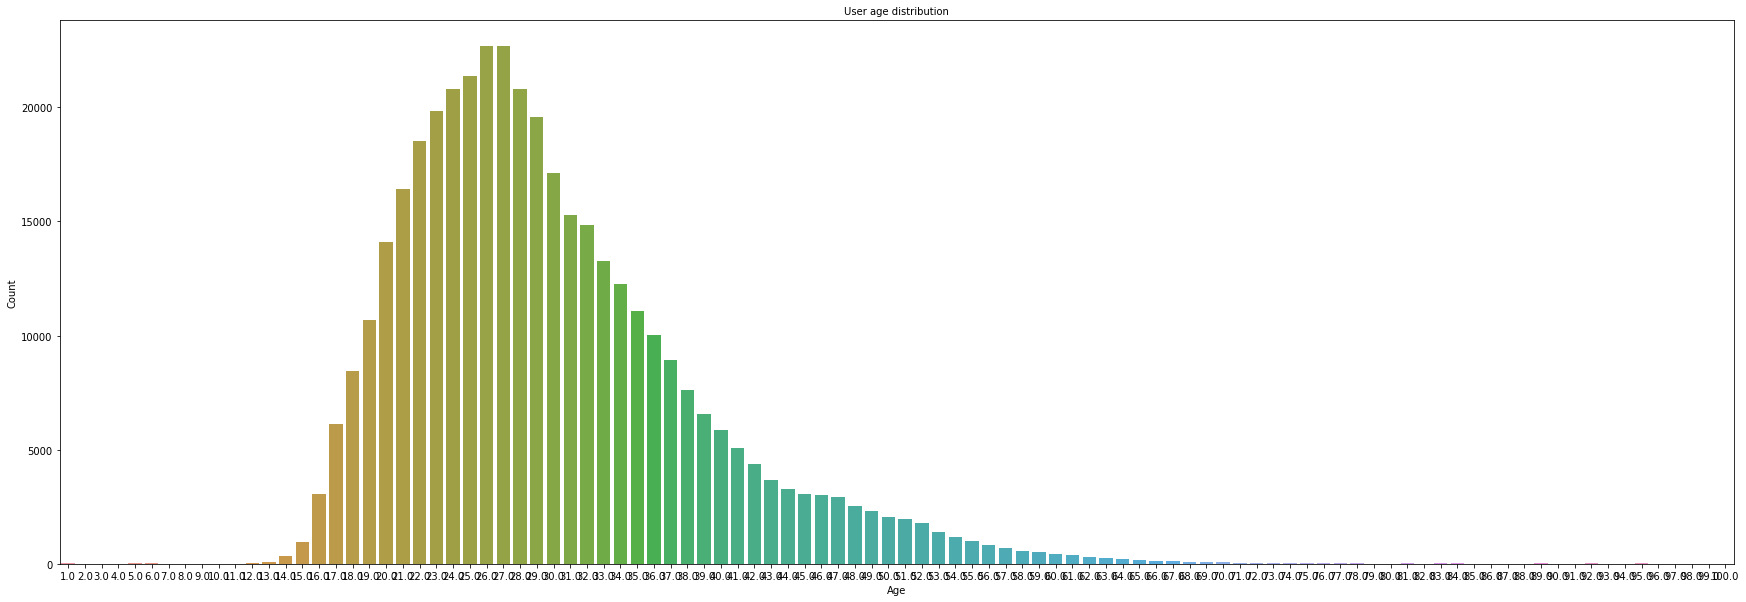

In [20]:
plt.figure(figsize= (30,10))
sns.countplot(x = age_explore.bd, data = age_explore)
plt.ylabel('Count',fontsize = 10)
plt.xlabel('Age', fontsize = 10)
plt.title("User age distribution", fontsize = 10)

* from the above graph, it looks like most of their user lies in the age around 30 which gives a pretty good information about their user group.

In [21]:
# Now let's explore the gender variable
train.gender.unique()

array(['female', 'male', nan], dtype=object)

In [22]:
### Lets see the data distribution of gender
###Percentage Null
print(train.gender.isnull().sum()/len(train))

0.601123340897


* It looks like there are 60% null values in gender.Not sure that we could use this data in model or not.For now we keep it and then after training the model we will see.

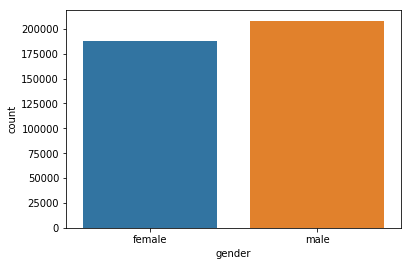

In [23]:
### Let's see the gender distribution
sns.countplot(x = train.gender, data = train)

In [24]:
### Let's see the plot of gender who have churned
churned = pd.crosstab(train.gender, train.is_churn)
print(churned)

is_churn       0      1
gender                 
female    171705  16152
male      189875  18325


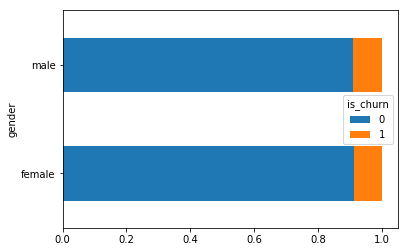

In [25]:
churned_rate = churned.div(churned.sum(1).astype(float),axis = 0)
churned_rate.plot(kind = 'barh',stacked= 'True')

* Not much information can be gathered from gender distribution

In [26]:
### Time for city distribution
print(sorted(train.city.unique()))

[1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, nan]


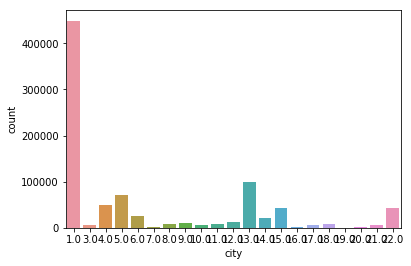

In [27]:
sns.countplot(x= train.city, data = train)

# Couple of interesting facts

* There is no 2 in the city

* majority of users registration comes from city 1 as evident above

In [28]:
### Checking number of Null in city
print(train.city.isnull().sum()/len(train))
print(sorted(train.registered_via.unique()))

0.117619451906
[3.0, 4.0, 7.0, 9.0, nan, 13.0]


In [29]:
### Scanning for registered via column
print(train.registered_via.isnull().sum()/len(train))

0.117619451906


* 11% null values.Proceeding head, we now look at the distribution

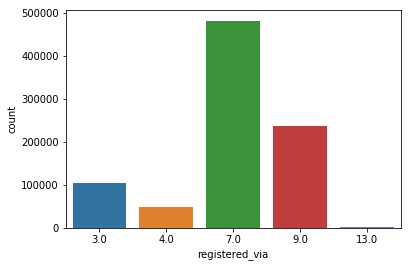

In [30]:
sns.countplot(x = train.registered_via, data = train)

* So, looks like most number of registration came from the source 7. Now let's look at  from where we are getting the most churn

In [31]:
churn_reg_via = pd.crosstab(train.registered_via,train.is_churn)
print(churn_reg_via)

is_churn             0      1
registered_via               
3.0              92041  13400
4.0              40285   8997
7.0             467205  14554
9.0             216153  20430
13.0              2815    263


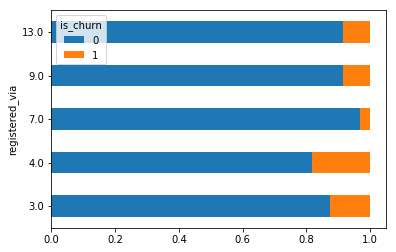

In [32]:
churn_reg_via_plot = churn_reg_via.div(churn_reg_via.sum(1).astype(float), axis = 0)
churn_reg_via_plot.plot(kind ='barh', stacked = 'True')

* interesting thing to note is the maximum churn relative to total registration is coming from source 4. might be a fluke but ccan be investigated in the future

### This complete our preliminary data exploration. Now we will incorporate the transaction and user_logs data.

In [89]:
#Transactional Data
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [90]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
msno                      object
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          int64
membership_expire_date    int64
is_cancel                 int64
dtypes: int64(8), object(1)
memory usage: 1.4+ GB


In [91]:
transactions.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07
mean,3.893310e+01,3.133906e+01,1.398850e+02,1.419873e+02,8.519661e-01,2.015760e+07,2.015862e+07,3.976523e-02
std,3.507936e+00,3.035649e+01,1.309647e+02,1.324824e+02,3.551336e-01,6.155979e+03,7.755753e+03,1.954072e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015091e+07,2.015102e+07,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016032e+07,2.016043e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016092e+07,2.016103e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017023e+07,2.017033e+07,1.000000e+00


In [92]:
print("Precentage Cancellations {}".format(transactions.is_cancel.sum()/len(transactions) * 100))
print("Percentage Auto Renew {}" .format(transactions.is_auto_renew.sum()/len(transactions) * 100))

Precentage Cancellations 3.976522648819046
Percentage Auto Renew 85.19661406812573


* looks these might be like there are very few cancelled transactions.It also looks like 15% of users does not have auto renew.They might be susceptible to churn. We will explore this later.

In [33]:
### processing transactions and user_log file
## Creating a list of valid users(msno)

valid_users = pd.concat([train, test]).msno.as_matrix()

In [34]:
### categorizing the requisite variables
gender = {'male' : 1 ,'female' : 2}
train.gender = train.gender.map(gender)
test.gender = test.gender.map(gender)

In [35]:
train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,20170907.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1.0,9.0,20050407.0,20170321.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,2.0,9.0,20051016.0,20170203.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,2.0,9.0,20051102.0,20170926.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,1.0,9.0,20051228.0,20170927.0


In [36]:
def log_data_load():
    user_log_chunk = pd.read_csv('user_logs.csv',chunksize= 10000000, iterator=True, low_memory= False, parse_dates= ['date'])
    user_logs = pd.DataFrame()
    i = 0
    for data in user_log_chunk:
        data = data[data.msno.isin(valid_users)]
        if i is 0:
            user_logs = data
        else:
            user_logs = pd.concat([user_logs,data])
        user_logs = user_logs.groupby(["msno"], as_index = False)["num_25", "num_50", "num_75",
                                                              "num_985", "num_100", "num_unq", "total_secs"].sum()
        i+=1
    print(user_logs.shape)
    return user_logs   

In [37]:
import time
t1 = time.time()
print("Loading user data....")
user_logs_combined = log_data_load()
t2 = time.time()
print("total time taken {}".format(t2-t1))

Loading user data....
(950184, 8)
total time taken 1232.7211112976074


In [38]:
user_logs_combined.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,572,289,284,504,2231,2805,719882.711
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1396,494,420,561,15572,15277,4061562.584
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,6688,2213,1476,1402,23807,24664,6683044.760
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1438,449,350,471,5092,3864,1485801.348
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1083,540,299,415,4803,6635,1398801.748


In [39]:
def combine_all_data():
    transactions = pd.read_csv('transactions.csv')
    ### To save memory and complexity, we will use transaction count only rather than anything else from transactions
    transaction_counts = pd.DataFrame(transactions['msno'].value_counts().reset_index())
    transaction_counts.columns = ['msno','trans_count']    
    #print(transaction_count.head())
    ### Combining the entire data into one final test and train column
    train_combined = pd.merge(train,transaction_counts,on = 'msno', how = 'left')
    train_final = pd.merge(train_combined,user_logs_combined, on = 'msno' , how = 'left')
    #print(train.head())
    #print(train_combined.head())
    test_combined = pd.merge(test,transaction_counts, on = 'msno', how = 'left')
    test_final = pd.merge(test_combined,user_logs_combined, on = 'msno' , how = 'left')
    
    ###We will be clearing the memory after this operation, so exporting the entire data out to train and test csv 
    ###files for further use
    train_final.to_csv('train_final.csv',header = True)
    test_final.to_csv('test_final.csv', header = True)
    
    ###Clearing the space for further use. If you have enough memory,then this can be skipped
    #clearing garbage
    #gc.collect()
    #%reset   


In [40]:
combine_all_data()

In [59]:
###Package reimport in case if reset command is run
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time
%matplotlib inline
print("Package imported")

Package imported


In [43]:
### This brings us to the final step, importing the data and creating the model. We will use xgboost here
###because of the extremely large size of our data.
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

In [44]:
train.head()

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date,trans_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,20170907.0,2,51.0,16.0,19.0,11.0,409.0,462.0,1.080519e+05
1,1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1.0,9.0,20050407.0,20170321.0,23,447.0,157.0,121.0,178.0,9942.0,7232.0,2.615312e+06
2,2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,2.0,9.0,20051016.0,20170203.0,10,1570.0,950.0,302.0,479.0,10033.0,11533.0,2.597385e+06
3,3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,2.0,9.0,20051102.0,20170926.0,2,7265.0,2420.0,1789.0,1634.0,18070.0,18479.0,4.945309e+06
4,4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,1.0,9.0,20051228.0,20170927.0,8,1389.0,714.0,682.0,3228.0,68731.0,72674.0,1.864415e+07


In [45]:
test.head()

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date,trans_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,0,5.0,28.0,1.0,3.0,20131223.0,20170822.0,6.0,367.0,84.0,44.0,82.0,1713.0,430.0,400295.413
1,1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,0,13.0,20.0,1.0,3.0,20131223.0,20170519.0,5.0,147.0,41.0,21.0,25.0,782.0,703.0,210036.732
2,2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,0,13.0,18.0,1.0,3.0,20131227.0,20170919.0,18.0,10545.0,724.0,391.0,399.0,6481.0,14866.0,1864038.044
3,3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,0,1.0,0.0,NaN,7.0,20140109.0,20160325.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,0,13.0,35.0,2.0,7.0,20140125.0,20180218.0,24.0,308.0,187.0,115.0,71.0,3091.0,3359.0,810176.562


In [46]:
train.fillna(0)

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date,trans_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,20170907.0,2,51.0,16.0,19.0,11.0,409.0,462.0,1.080519e+05
1,1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1.0,9.0,20050407.0,20170321.0,23,447.0,157.0,121.0,178.0,9942.0,7232.0,2.615312e+06
2,2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,2.0,9.0,20051016.0,20170203.0,10,1570.0,950.0,302.0,479.0,10033.0,11533.0,2.597385e+06
3,3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,2.0,9.0,20051102.0,20170926.0,2,7265.0,2420.0,1789.0,1634.0,18070.0,18479.0,4.945309e+06
4,4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,1.0,9.0,20051228.0,20170927.0,8,1389.0,714.0,682.0,3228.0,68731.0,72674.0,1.864415e+07
5,5,GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=,1,6.0,23.0,2.0,9.0,20060331.0,20170215.0,22,1237.0,275.0,162.0,249.0,9722.0,8056.0,2.514027e+06
6,6,lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=,1,13.0,29.0,2.0,9.0,20060406.0,20170208.0,11,432.0,56.0,45.0,42.0,12892.0,9261.0,2.873031e+06
7,7,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,11.0,22.0,1.0,9.0,20060425.0,20170906.0,22,17660.0,2162.0,1778.0,1600.0,29949.0,46451.0,8.350786e+06
8,8,Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=,1,18.0,22.0,2.0,9.0,20060826.0,20170908.0,22,1816.0,407.0,296.0,266.0,36695.0,19944.0,9.158728e+06
9,9,MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=,1,11.0,30.0,2.0,9.0,20061123.0,20170324.0,5,102.0,18.0,22.0,28.0,1502.0,1201.0,4.179298e+05


In [47]:
test.fillna(0)

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date,trans_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,0,5.0,28.0,1.0,3.0,20131223.0,20170822.0,6.0,367.0,84.0,44.0,82.0,1713.0,430.0,4.002954e+05
1,1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,0,13.0,20.0,1.0,3.0,20131223.0,20170519.0,5.0,147.0,41.0,21.0,25.0,782.0,703.0,2.100367e+05
2,2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,0,13.0,18.0,1.0,3.0,20131227.0,20170919.0,18.0,10545.0,724.0,391.0,399.0,6481.0,14866.0,1.864038e+06
3,3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,0,1.0,0.0,0.0,7.0,20140109.0,20160325.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,0,13.0,35.0,2.0,7.0,20140125.0,20180218.0,24.0,308.0,187.0,115.0,71.0,3091.0,3359.0,8.101766e+05
5,5,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,0,22.0,0.0,0.0,3.0,20140126.0,20170922.0,20.0,391.0,120.0,107.0,78.0,2038.0,2264.0,5.463038e+05
6,6,kVmM8X4iBPCOfK/m1l3KR7LjFoxD1EcKYCc76F5IAWw=,0,1.0,0.0,0.0,7.0,20140129.0,20170307.0,8.0,14.0,6.0,0.0,5.0,238.0,256.0,5.519934e+04
7,7,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,0,9.0,28.0,2.0,3.0,20140202.0,20180513.0,2.0,1894.0,548.0,434.0,422.0,21216.0,17344.0,5.597722e+06
8,8,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,0,13.0,20.0,2.0,9.0,20140212.0,20180217.0,8.0,3329.0,791.0,385.0,463.0,8522.0,10841.0,2.282225e+06
9,9,otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=,0,13.0,0.0,0.0,7.0,20140228.0,20171025.0,23.0,13010.0,862.0,515.0,696.0,16891.0,19692.0,4.344629e+06


In [99]:
### We are using xgboost for classification. We also might have to encounter for imbalanced classification in this
###problem
import xgboost as xgb
from sklearn.model_selection import train_test_split
def xgbooster():
    params = {
        'objective' : 'binary:logistic',
        'eval_metric' : 'logloss',
        'silent' : True,
        'eta' : 0.002,
        'max_depth' : 7,
        'seed': 0
    }
    
    #x1 = train.drop(['msno','is_churn'], axis = 1)
    #x2 = test.drop(['is_churn'], axis= 1)
    
    cols = [c for c in train.columns if c not in ['is_churn','msno','Unnamed: 0']]
    #print(cols)
    
    x1, x2, y1, y2 = train_test_split(train[cols], train['is_churn'], test_size=0.3, random_state=0)
    
    
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    
    model = xgb.train(params, xgb.DMatrix(x1, y1), 1500,  watchlist, maximize=False, verbose_eval=150, early_stopping_rounds=10)
    
    pred = model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)

    test.is_churn = pred
    
    test[['msno', 'is_churn']].to_csv('Submission_Final.csv', index= False)
    
    ###Variable Importance
    
    xgb.plot_importance(booster = model)

[0]	train-logloss:0.691398	valid-logloss:0.691399
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[150]	train-logloss:0.490538	valid-logloss:0.490649
[300]	train-logloss:0.367981	valid-logloss:0.368205
[450]	train-logloss:0.28843	valid-logloss:0.288763
[600]	train-logloss:0.234947	valid-logloss:0.235394
[750]	train-logloss:0.198128	valid-logloss:0.198693
[900]	train-logloss:0.172546	valid-logloss:0.17322
[1050]	train-logloss:0.154507	valid-logloss:0.155302
[1200]	train-logloss:0.141869	valid-logloss:0.142772
[1350]	train-logloss:0.132714	valid-logloss:0.133781


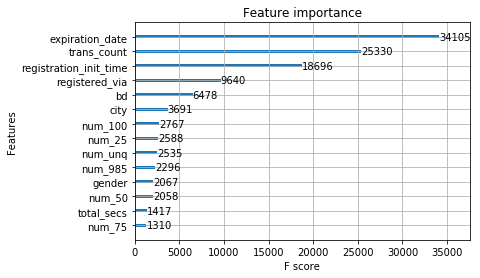

In [100]:
t1 = time.time()
xgbooster()
t2 = time.time()
print("Model running time {}".format(t2-t1))